# Transfer Learning for Durum Wheat Classification

<img src='grano_duro_BIO.jpg' width=1000>

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
img_path='Dataset2-Durum Wheat Video Images'
os.listdir(img_path)

['1-Images from Vitreous Durum Wheat',
 '2-Images from Starchy Durum Wheat',
 '3-Images from Foreign Matters',
 '4-Images from Mixture of All Durum Wheat and Foreign Matters',
 '5-Images form Mixture of All Durum Wheat and Foreign Matters (Labeled)']

### Transfer Learning with VGG16

In [13]:
data_dir='Dataset2-Durum Wheat Video Images'
img_width,img_height=224,224

datagen=ImageDataGenerator(rescale=1/255,validation_split=.2)
train_datagen=datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='sparse',subset='training',shuffle=False)

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='sparse',subset='validation',shuffle=False)
base_model=VGG16(weights='imagenet',input_shape=(img_width,img_height,3),include_top=False)

Found 260 images belonging to 5 classes.
Found 65 images belonging to 5 classes.


In [15]:
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_datagen,epochs=15,validation_data=test_datagen)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.0538 - loss: 18.8860 - val_accuracy: 0.4000 - val_loss: 5.2789
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5038 - loss: 3.3098 - val_accuracy: 0.6923 - val_loss: 2.4066
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7962 - loss: 0.6293 - val_accuracy: 0.4462 - val_loss: 0.8369
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9423 - loss: 0.1443 - val_accuracy: 1.0000 - val_loss: 0.1026
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 0.8000 - val_loss: 0.3285
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9808 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.0558
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8769 - val_loss: 0.2176
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.9385 - val_loss: 0.1191
Epoch 9

### Model Overview

In [20]:
model.save('cnn_model.h5')

In [23]:
history.history['accuracy'][-1]

1.0

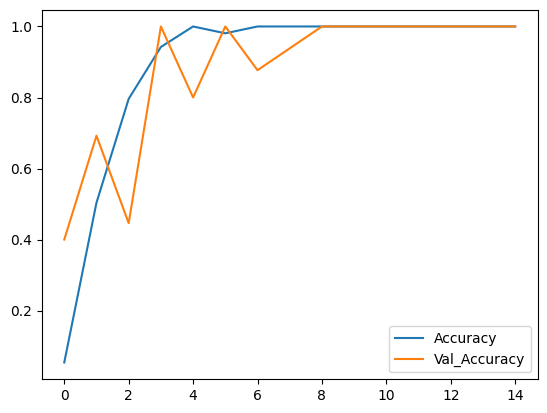

In [25]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

### Model Testing

In [27]:
test_labels = test_datagen.classes
predictions = model.predict(test_datagen)
predicted_classes = np.argmax(predictions, axis=1)  
accuracy_score(test_labels, predicted_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


1.0

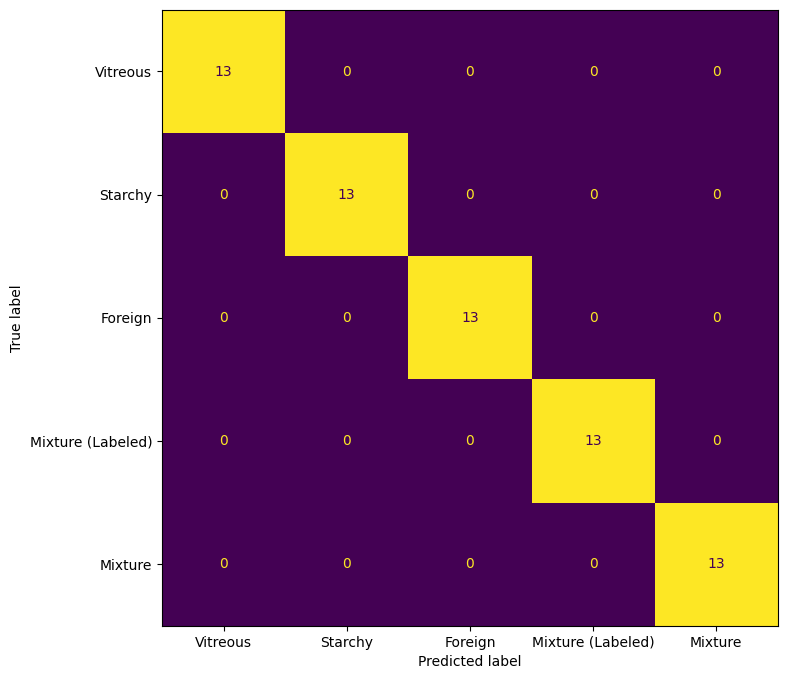

In [29]:
labels=['Vitreous','Starchy','Foreign','Mixture (Labeled)','Mixture']
cm = confusion_matrix(test_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="viridis", colorbar=False);